In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/final_year_project_dataset')

In [4]:
Categories=['COVID','non-COVID']
print("Type y to give categories or type n to go with classification of Covid and Non- Covid");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type n to go with classification of Covid and Non- Covid
n


In [7]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/final_year_project_dataset'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target

loading... category : COVID
loaded category:COVID successfully
loading... category : non-COVID
loaded category:non-COVID successfully


In [8]:
DATADIR = '/content/drive/MyDrive/final_year_project_dataset'
CATEGORIES = ['COVID','non-COVID']
IMG_SIZE=100

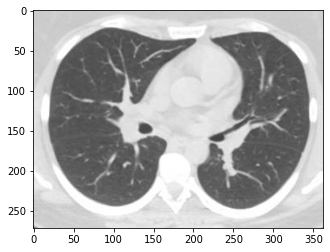

In [9]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [10]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()    

In [11]:
print(len(training_data))

2481


In [12]:
lenofimage = len(training_data)

In [13]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [14]:
X.shape

(2481, 30000)

In [15]:
X = X/255.0

In [16]:
X[1]

array([0.26666667, 0.26666667, 0.26666667, ..., 0.29411765, 0.29411765,
       0.29411765])

In [17]:
y=np.array(y)

In [18]:
y.shape

(2481,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [20]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [21]:
y2 = svc.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.8083735909822867


In [23]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.79      0.83      0.81       305
           1       0.83      0.79      0.81       316

    accuracy                           0.81       621
   macro avg       0.81      0.81      0.81       621
weighted avg       0.81      0.81      0.81       621



In [24]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [25]:
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
616,1,1
617,1,0
618,1,1
619,0,0
